#Libary Yfinance

In [1]:
# prompt: Cek versi yfinance di upgrade sampai dengan 0.2.59

!pip install --upgrade yfinance


In [2]:
# pip install --upgrade tensorflow

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from joblib import load

ticker = "TLKM.JK"

In [4]:
# prompt: cek versi yfinance
print("Library Versions:")
print("------------------")
print("yfinance:", yf.__version__)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("tensorflow:", tf.__version__)
print("Keras:",tf.keras.__version__)
print("matplotlib:", matplotlib.__version__)
print('Seaborn',sns.__version__ )
print('joblib',joblib.__version__ )

Library Versions:
------------------
yfinance: 0.2.63
pandas: 2.2.2
numpy: 2.0.2
scikit-learn: 1.6.1
tensorflow: 2.18.0
Keras: 3.8.0
matplotlib: 3.10.0
Seaborn 0.13.2
joblib 1.5.1


##Data harga saham

In [5]:
data_stocks = yf.download(ticker, start = '2021-12-31', end='2025-05-11')

print(data_stocks)

<ipython-input-5-2553155971>:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_stocks = yf.download(ticker, start = '2021-12-31', end='2025-05-11')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open     Volume
Ticker          TLKM.JK      TLKM.JK      TLKM.JK      TLKM.JK    TLKM.JK
Date                                                                     
2022-01-03  3380.564453  3380.564453  3275.427281  3283.514756   65937900
2022-01-04  3372.476807  3396.739230  3356.301858  3380.564281   42984700
2022-01-05  3275.427002  3388.651639  3259.252054  3356.301743  119584700
2022-01-06  3332.039307  3332.039307  3259.252040  3307.776885   89197500
2022-01-07  3372.476807  3388.651755  3307.777012  3332.039435   68415100
...                 ...          ...          ...          ...        ...
2025-05-05  2502.866211  2512.136086  2475.056586  2512.136086   85592500
2025-05-06  2484.326416  2530.675789  2484.326416  2521.405915   76948300
2025-05-07  2428.707275  2493.596401  2428.707275  2484.326526  100293700
2025-05-08  2382.357910  2447.247036  2382.357910  2437.977161  122965300
2025-05-09  2410.167480  2437.977105  

In [6]:
data_stocks.columns = data_stocks.columns.droplevel(1)

# data_stocks.reset_index(inplace=True)



In [7]:
print(data_stocks.head())

Price             Close         High          Low         Open     Volume
Date                                                                     
2022-01-03  3380.564453  3380.564453  3275.427281  3283.514756   65937900
2022-01-04  3372.476807  3396.739230  3356.301858  3380.564281   42984700
2022-01-05  3275.427002  3388.651639  3259.252054  3356.301743  119584700
2022-01-06  3332.039307  3332.039307  3259.252040  3307.776885   89197500
2022-01-07  3372.476807  3388.651755  3307.777012  3332.039435   68415100


In [8]:
data_stocks.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [9]:
# data_stocks.to_csv('Data saham.csv')

##Ambil data keuangan fundamental

###Income Statement

In [10]:
stock = yf.Ticker(ticker)

In [11]:
quartaly_income = stock.quarterly_financials
quartaly_income.columns

DatetimeIndex(['2025-03-31', '2024-12-31', '2024-09-30', '2024-06-30',
               '2024-03-31', '2023-09-30'],
              dtype='datetime64[ns]', freq=None)

In [12]:
# Ubah nama kolom '2023-09-30' menjadi '2023-12-31'
quartaly_income.rename(columns={pd.to_datetime("2023-09-30"): pd.to_datetime("2023-12-31")}, inplace=True)
quartaly_income["2023-12-31"] = 5600000000000.0


In [13]:
quartaly_income = quartaly_income.T

In [14]:
quartaly_income.columns

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Rent Expense Supplemental',
       'Total Operating Income As Reported', 'Diluted Average Shares',
       'Basic Average Shares', 'Diluted EPS', 'Basic EPS',
       'Diluted NI Availto Com Stockholders', 'Net Income Common Stockholders',
       'Net Income', 'Minority Interests',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Earnings F

In [15]:
quartaly_income

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Depreciation And Amortization In Income Statement,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2025-03-31,80426590198.123047,0.207821,18574000000000.0,387000000000.0,387000000000.0,5810000000000.0,8055000000000.0,11672000000000.0,18961000000000.0,10906000000000.0,...,8055000000000.0,6060000000000.0,766000000000.0,5294000000000.0,1136000000000.0,4158000000000.0,24967000000000.0,11672000000000.0,36639000000000.0,36639000000000.0
2024-12-31,158843412640.184479,0.192537,18426000000000.0,825000000000.0,825000000000.0,5936000000000.0,8346000000000.0,13097000000000.0,19251000000000.0,10905000000000.0,...,8346000000000.0,6334000000000.0,1297000000000.0,5037000000000.0,933000000000.0,4104000000000.0,24651000000000.0,13097000000000.0,37748000000000.0,30515000000000.0
2024-09-30,36125335258.923042,0.216319,19086000000000.0,167000000000.0,167000000000.0,5914000000000.0,8121000000000.0,11975000000000.0,19253000000000.0,11132000000000.0,...,8121000000000.0,5972000000000.0,956000000000.0,5016000000000.0,1345000000000.0,3671000000000.0,24952000000000.0,11975000000000.0,36927000000000.0,36927000000000.0
2024-06-30,-76093251533.742325,0.222495,19386000000000.0,-342000000000.0,-342000000000.0,5708000000000.0,8044000000000.0,11448000000000.0,19044000000000.0,11000000000000.0,...,8044000000000.0,7646000000000.0,777000000000.0,6869000000000.0,1613000000000.0,5256000000000.0,26415000000000.0,11448000000000.0,37863000000000.0,37863000000000.0
2024-03-31,-74662131519.274384,0.229025,19753000000000.0,-326000000000.0,-326000000000.0,6053000000000.0,8085000000000.0,11562000000000.0,19427000000000.0,11342000000000.0,...,8085000000000.0,6000000000000.0,794000000000.0,5206000000000.0,977000000000.0,4229000000000.0,25867000000000.0,11562000000000.0,37429000000000.0,37429000000000.0
2023-12-31,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,...,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0,5600000000000.0


In [16]:
columns_needed = [
    'Net Income'
]

filtered_data_income = quartaly_income[columns_needed]

print(filtered_data_income)

                 Net Income
2025-03-31  5810000000000.0
2024-12-31  5936000000000.0
2024-09-30  5914000000000.0
2024-06-30  5708000000000.0
2024-03-31  6053000000000.0
2023-12-31  5600000000000.0


In [17]:
quartaly_income = filtered_data_income.T
quartaly_income

,2025-03-31,2024-12-31,2024-09-30,2024-06-30,2024-03-31,2023-12-31
Net Income,5810000000000.0,5936000000000.0,5914000000000.0,5708000000000.0,6053000000000.0,5600000000000.0


In [18]:
# quartaly_income.to_csv('income statements.csv')

Dokumentasi

In [19]:
# stock = yf.Ticker(ticker)
# quartaly_income = stock.quarterly_financials

# quartaly_income.rename(columns={pd.to_datetime("2023-09-30"): pd.to_datetime("2023-12-31")}, inplace=True)
# quartaly_income["2023-12-31"] = 5600000000000.0

# quartaly_income = quartaly_income.T


# columns_needed = [
#     'Net Income'
# ]

# filtered_data_income = quartaly_income[columns_needed]

# print(filtered_data_income)


###Balance statement

In [20]:
quartaly_balance = stock.balance_sheet
quartaly_balance.columns

DatetimeIndex(['2024-12-31', '2023-12-31', '2022-12-31', '2021-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq=None)

In [21]:
print(quartaly_balance)

                                                         2024-12-31  \
Ordinary Shares Number                                99062216600.0   
Share Issued                                          99062216600.0   
Net Debt                                           19004000000000.0   
Total Debt                                         76834000000000.0   
Tangible Book Value                               124242000000000.0   
...                                                             ...   
Cash Cash Equivalents And Short Term Investments   35027000000000.0   
Other Short Term Investments                        1122000000000.0   
Cash And Cash Equivalents                          33905000000000.0   
Cash Equivalents                                   10536000000000.0   
Cash Financial                                     23369000000000.0   

                                                         2023-12-31  \
Ordinary Shares Number                                99062216600.0   
Share

In [22]:
quartaly_balance = quartaly_balance.T
quartaly_balance.columns


Index(['Ordinary Shares Number', 'Share Issued', 'Net Debt', 'Total Debt',
       'Tangible Book Value', 'Invested Capital', 'Working Capital',
       'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Minority Interest',
       'Stockholders Equity', 'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Retained Earnings',
       'Additional Paid In Capital', 'Capital Stock', 'Common Stock',
       'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Employee Benefits',
       'Non Current Pension And Other Postretirement Benefit Plans',
       'Non Current Deferred Liabilities', 'Non Current Deferred Revenue',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long 

In [23]:
quartaly_balance

,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,...,Receivables Adjustments Allowances,Other Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2024-12-31,99062216600.0,99062216600.0,19004000000000.0,76834000000000.0,124242000000000.0,194797000000000.0,-13629000000000.0,124242000000000.0,23925000000000.0,141888000000000.0,...,NaN,3085000000000.0,12193000000000.0,-6064000000000.0,18257000000000.0,35027000000000.0,1122000000000.0,33905000000000.0,10536000000000.0,23369000000000.0
2023-12-31,99062216600.0,99062216600.0,18692000000000.0,68001000000000.0,118724000000000.0,183275000000000.0,-15823000000000.0,118724000000000.0,20302000000000.0,135576000000000.0,...,NaN,2985000000000.0,10667000000000.0,-7506000000000.0,18173000000000.0,30430000000000.0,1423000000000.0,29007000000000.0,14374000000000.0,14633000000000.0
2022-12-31,99062216600.0,99062216600.0,12433000000000.0,62853000000000.0,114183000000000.0,173604000000000.0,-15162000000000.0,114183000000000.0,18473000000000.0,129224000000000.0,...,NaN,2718000000000.0,8634000000000.0,-7568000000000.0,16202000000000.0,32883000000000.0,936000000000.0,31947000000000.0,10762000000000.0,21185000000000.0
2021-12-31,99062216600.0,99062216600.0,14380000000000.0,68579000000000.0,107215000000000.0,174322000000000.0,-7407000000000.0,107215000000000.0,15888000000000.0,121631000000000.0,...,NaN,2525000000000.0,8510000000000.0,-7802000000000.0,16312000000000.0,38740000000000.0,429000000000.0,38311000000000.0,13989000000000.0,24322000000000.0
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-227000000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
columns_needed_balaced = [
    'Stockholders Equity',
    'Long Term Debt',
    'Total Assets',
    'Total Liabilities Net Minority Interest'
]

filtered_data_balance = quartaly_balance[columns_needed_balaced]

print(filtered_data_balance)

           Stockholders Equity    Long Term Debt       Total Assets  \
2024-12-31   141888000000000.0  25518000000000.0  299297000000000.0   
2023-12-31   135576000000000.0  27773000000000.0  286592000000000.0   
2022-12-31   129224000000000.0  27331000000000.0  274817000000000.0   
2021-12-31   121631000000000.0  36319000000000.0  276158000000000.0   
2020-12-31                 NaN               NaN                NaN   

           Total Liabilities Net Minority Interest  
2024-12-31                       137151000000000.0  
2023-12-31                       130357000000000.0  
2022-12-31                       125742000000000.0  
2021-12-31                       130986000000000.0  
2020-12-31                                     NaN  


In [25]:
quartaly_balance = filtered_data_balance.T
quartaly_balance

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Stockholders Equity,141888000000000.0,135576000000000.0,129224000000000.0,121631000000000.0,NaN
Long Term Debt,25518000000000.0,27773000000000.0,27331000000000.0,36319000000000.0,NaN
Total Assets,299297000000000.0,286592000000000.0,274817000000000.0,276158000000000.0,NaN
Total Liabilities Net Minority Interest,137151000000000.0,130357000000000.0,125742000000000.0,130986000000000.0,NaN


In [26]:
# quartaly_balance.to_csv('balance sheet.csv')

Dokumentasi

In [27]:
# stock = yf.Ticker(ticker)
# quartaly_balance = stock.balance_sheet
# quartaly_balance = quartaly_balance.T
# columns_needed_balaced = [
#     'Stockholders Equity',
#     'Long Term Debt',
#     'Total Assets',
#     'Total Liabilities Net Minority Interest'
# ]

# filtered_data_balance = quartaly_balance[columns_needed_balaced]

# print(filtered_data_balance)

In [28]:
# filtered_data_balance.to_csv('dokumentasi.csv')

### Pegabungan data saham, income statemant dan balance sheet

In [29]:
merged_data = pd.concat([data_stocks, filtered_data_income, filtered_data_balance], axis=1)

print(merged_data)

                  Close         High          Low         Open       Volume  \
2020-12-31          NaN          NaN          NaN          NaN          NaN   
2021-12-31          NaN          NaN          NaN          NaN          NaN   
2022-01-03  3380.564453  3380.564453  3275.427281  3283.514756   65937900.0   
2022-01-04  3372.476807  3396.739230  3356.301858  3380.564281   42984700.0   
2022-01-05  3275.427002  3388.651639  3259.252054  3356.301743  119584700.0   
...                 ...          ...          ...          ...          ...   
2025-05-05  2502.866211  2512.136086  2475.056586  2512.136086   85592500.0   
2025-05-06  2484.326416  2530.675789  2484.326416  2521.405915   76948300.0   
2025-05-07  2428.707275  2493.596401  2428.707275  2484.326526  100293700.0   
2025-05-08  2382.357910  2447.247036  2382.357910  2437.977161  122965300.0   
2025-05-09  2410.167480  2437.977105  2382.357856  2382.357856   59433500.0   

           Net Income Stockholders Equity    Long T

In [30]:
filtered_data = merged_data[merged_data.index >= '2021-12-31']
print(filtered_data)

                  Close         High          Low         Open       Volume  \
2021-12-31          NaN          NaN          NaN          NaN          NaN   
2022-01-03  3380.564453  3380.564453  3275.427281  3283.514756   65937900.0   
2022-01-04  3372.476807  3396.739230  3356.301858  3380.564281   42984700.0   
2022-01-05  3275.427002  3388.651639  3259.252054  3356.301743  119584700.0   
2022-01-06  3332.039307  3332.039307  3259.252040  3307.776885   89197500.0   
...                 ...          ...          ...          ...          ...   
2025-05-05  2502.866211  2512.136086  2475.056586  2512.136086   85592500.0   
2025-05-06  2484.326416  2530.675789  2484.326416  2521.405915   76948300.0   
2025-05-07  2428.707275  2493.596401  2428.707275  2484.326526  100293700.0   
2025-05-08  2382.357910  2447.247036  2382.357910  2437.977161  122965300.0   
2025-05-09  2410.167480  2437.977105  2382.357856  2382.357856   59433500.0   

           Net Income Stockholders Equity    Long T

In [31]:
# filtered_data.fillna(method="ffill", inplace=True)
# print(filtered_data)

In [32]:
filtered_data.head()

,Close,High,Low,Open,Volume,Net Income,Stockholders Equity,Long Term Debt,Total Assets,Total Liabilities Net Minority Interest
2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,121631000000000.0,36319000000000.0,276158000000000.0,130986000000000.0
2022-01-03,3380.564453,3380.564453,3275.427281,3283.514756,65937900.0,NaN,NaN,NaN,NaN,NaN
2022-01-04,3372.476807,3396.739230,3356.301858,3380.564281,42984700.0,NaN,NaN,NaN,NaN,NaN
2022-01-05,3275.427002,3388.651639,3259.252054,3356.301743,119584700.0,NaN,NaN,NaN,NaN,NaN
2022-01-06,3332.039307,3332.039307,3259.252040,3307.776885,89197500.0,NaN,NaN,NaN,NaN,NaN


In [33]:
# filtered_data = filtered_data[filtered_data.index >= '2021-12-31']
# print(filtered_data)

In [34]:
filtered_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Net Income',
       'Stockholders Equity', 'Long Term Debt', 'Total Assets',
       'Total Liabilities Net Minority Interest'],
      dtype='object')

In [35]:
filtered_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Net Income',
       'Stockholders Equity', 'Long Term Debt', 'Total Assets',
       'Total Liabilities Net Minority Interest'],
      dtype='object')

In [36]:
# filtered_data.to_csv('Unnormalisasi_data_sheet_new_fill.csv')

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Penggabungan data

Ambil data saham dari pihak eksternal net income

In [38]:
import pandas as pd

# Membaca file yang diunggah (misalnya CSV)
file_path = '/content/drive/MyDrive/Dataset/Skripsi/Unnormalisasi_data_sheet_new_fill.csv'
df = pd.read_csv(file_path)

# Menampilkan data yang diunggah
print(df.head())


   Unnamed: 0        Close         High          Low         Open  \
0  12/31/2021          NaN          NaN          NaN          NaN   
1    1/3/2022  3646.828613  3646.828613  3533.410499  3542.134969   
2    1/4/2022  3638.104004  3664.277414  3620.655064  3646.828474   
3    1/5/2022  3533.410400  3655.552982  3515.961460  3620.655102   
4    1/6/2022  3594.481689  3594.481689  3515.961458  3568.308279   

        Volume    Net Income  Stockholders Equity  Long Term Debt  \
0          NaN  5.890000e+12         1.216310e+14    3.631900e+13   
1   65937900.0           NaN                  NaN             NaN   
2   42984700.0           NaN                  NaN             NaN   
3  119584700.0           NaN                  NaN             NaN   
4   89197500.0           NaN                  NaN             NaN   

   Total Assets  Total Liabilities Net Minority Interest  
0  2.761580e+14                             1.309860e+14  
1           NaN                                     

In [39]:
df = df.ffill()
print(df.head())

   Unnamed: 0        Close         High          Low         Open  \
0  12/31/2021          NaN          NaN          NaN          NaN   
1    1/3/2022  3646.828613  3646.828613  3533.410499  3542.134969   
2    1/4/2022  3638.104004  3664.277414  3620.655064  3646.828474   
3    1/5/2022  3533.410400  3655.552982  3515.961460  3620.655102   
4    1/6/2022  3594.481689  3594.481689  3515.961458  3568.308279   

        Volume    Net Income  Stockholders Equity  Long Term Debt  \
0          NaN  5.890000e+12         1.216310e+14    3.631900e+13   
1   65937900.0  5.890000e+12         1.216310e+14    3.631900e+13   
2   42984700.0  5.890000e+12         1.216310e+14    3.631900e+13   
3  119584700.0  5.890000e+12         1.216310e+14    3.631900e+13   
4   89197500.0  5.890000e+12         1.216310e+14    3.631900e+13   

   Total Assets  Total Liabilities Net Minority Interest  
0  2.761580e+14                             1.309860e+14  
1  2.761580e+14                             1.309860

In [40]:
df.to_csv('filtered_data_sheet_new_fill.csv')

### Cleanshing


In [41]:
print(df)

     Unnamed: 0        Close         High          Low         Open  \
0    12/31/2021          NaN          NaN          NaN          NaN   
1      1/3/2022  3646.828613  3646.828613  3533.410499  3542.134969   
2      1/4/2022  3638.104004  3664.277414  3620.655064  3646.828474   
3      1/5/2022  3533.410400  3655.552982  3515.961460  3620.655102   
4      1/6/2022  3594.481689  3594.481689  3515.961458  3568.308279   
..          ...          ...          ...          ...          ...   
804    5/5/2025  2700.000000  2710.000000  2670.000000  2710.000000   
805    5/6/2025  2680.000000  2730.000000  2680.000000  2720.000000   
806    5/7/2025  2620.000000  2690.000000  2620.000000  2680.000000   
807    5/8/2025  2570.000000  2640.000000  2570.000000  2630.000000   
808    5/9/2025  2600.000000  2630.000000  2570.000000  2570.000000   

          Volume    Net Income  Stockholders Equity  Long Term Debt  \
0            NaN  5.890000e+12         1.216310e+14    3.631900e+13   
1    

In [42]:
df.columns

Index(['Unnamed: 0', 'Close', 'High', 'Low', 'Open', 'Volume', 'Net Income',
       'Stockholders Equity', 'Long Term Debt', 'Total Assets',
       'Total Liabilities Net Minority Interest'],
      dtype='object')

In [43]:
# Menghapus kolom tertentu
df = df.drop(columns=['Volume'])
df.columns

Index(['Unnamed: 0', 'Close', 'High', 'Low', 'Open', 'Net Income',
       'Stockholders Equity', 'Long Term Debt', 'Total Assets',
       'Total Liabilities Net Minority Interest'],
      dtype='object')

Cek nilai kosong dan nan

In [44]:
# Cek jumlah nilai NaN per kolom
print("Jumlah nilai NaN per kolom sebelum dihapus:")
print(df.isnull().sum())

df.head()

Jumlah nilai NaN per kolom sebelum dihapus:
Unnamed: 0                                 0
Close                                      1
High                                       1
Low                                        1
Open                                       1
Net Income                                 0
Stockholders Equity                        0
Long Term Debt                             0
Total Assets                               0
Total Liabilities Net Minority Interest    0
dtype: int64


,Unnamed: 0,Close,High,Low,Open,Net Income,Stockholders Equity,Long Term Debt,Total Assets,Total Liabilities Net Minority Interest
0,12/31/2021,NaN,NaN,NaN,NaN,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
1,1/3/2022,3646.828613,3646.828613,3533.410499,3542.134969,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
2,1/4/2022,3638.104004,3664.277414,3620.655064,3646.828474,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
3,1/5/2022,3533.410400,3655.552982,3515.961460,3620.655102,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
4,1/6/2022,3594.481689,3594.481689,3515.961458,3568.308279,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14


In [45]:
# Hapus baris yang memiliki setidaknya satu nilai NaN
df = df.dropna()

# Cek jumlah nilai NaN per kolom setelah dihapus
print("\nJumlah nilai NaN per kolom setelah dihapus:")
print(df.isnull().sum())

df.head()


Jumlah nilai NaN per kolom setelah dihapus:
Unnamed: 0                                 0
Close                                      0
High                                       0
Low                                        0
Open                                       0
Net Income                                 0
Stockholders Equity                        0
Long Term Debt                             0
Total Assets                               0
Total Liabilities Net Minority Interest    0
dtype: int64


,Unnamed: 0,Close,High,Low,Open,Net Income,Stockholders Equity,Long Term Debt,Total Assets,Total Liabilities Net Minority Interest
1,1/3/2022,3646.828613,3646.828613,3533.410499,3542.134969,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
2,1/4/2022,3638.104004,3664.277414,3620.655064,3646.828474,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
3,1/5/2022,3533.410400,3655.552982,3515.961460,3620.655102,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
4,1/6/2022,3594.481689,3594.481689,3515.961458,3568.308279,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
5,1/7/2022,3638.104004,3655.552944,3568.308244,3594.481654,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14


In [46]:
df.head()

,Unnamed: 0,Close,High,Low,Open,Net Income,Stockholders Equity,Long Term Debt,Total Assets,Total Liabilities Net Minority Interest
1,1/3/2022,3646.828613,3646.828613,3533.410499,3542.134969,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
2,1/4/2022,3638.104004,3664.277414,3620.655064,3646.828474,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
3,1/5/2022,3533.410400,3655.552982,3515.961460,3620.655102,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
4,1/6/2022,3594.481689,3594.481689,3515.961458,3568.308279,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
5,1/7/2022,3638.104004,3655.552944,3568.308244,3594.481654,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 1 to 808
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               808 non-null    object 
 1   Close                                    808 non-null    float64
 2   High                                     808 non-null    float64
 3   Low                                      808 non-null    float64
 4   Open                                     808 non-null    float64
 5   Net Income                               808 non-null    float64
 6   Stockholders Equity                      808 non-null    float64
 7   Long Term Debt                           808 non-null    float64
 8   Total Assets                             808 non-null    float64
 9   Total Liabilities Net Minority Interest  808 non-null    float64
dtypes: float64(9), object(1)
memory usage: 101.7+ KB


Ganti tanggal menjadi tipe data tanggal

In [48]:
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [49]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 808 entries, 2022-01-03 to 2025-05-09
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Close                                    808 non-null    float64
 1   High                                     808 non-null    float64
 2   Low                                      808 non-null    float64
 3   Open                                     808 non-null    float64
 4   Net Income                               808 non-null    float64
 5   Stockholders Equity                      808 non-null    float64
 6   Long Term Debt                           808 non-null    float64
 7   Total Assets                             808 non-null    float64
 8   Total Liabilities Net Minority Interest  808 non-null    float64
dtypes: float64(9)
memory usage: 63.1 KB


Ubah net Income ke float

In [50]:
df['Net Income'] = pd.to_numeric(df['Net Income'], errors='coerce').astype('float64')


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 808 entries, 2022-01-03 to 2025-05-09
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Close                                    808 non-null    float64
 1   High                                     808 non-null    float64
 2   Low                                      808 non-null    float64
 3   Open                                     808 non-null    float64
 4   Net Income                               808 non-null    float64
 5   Stockholders Equity                      808 non-null    float64
 6   Long Term Debt                           808 non-null    float64
 7   Total Assets                             808 non-null    float64
 8   Total Liabilities Net Minority Interest  808 non-null    float64
dtypes: float64(9)
memory usage: 63.1 KB


In [52]:
df.head(5)

,Close,High,Low,Open,Net Income,Stockholders Equity,Long Term Debt,Total Assets,Total Liabilities Net Minority Interest
Date,,,,,,,,,
2022-01-03,3646.828613,3646.828613,3533.410499,3542.134969,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
2022-01-04,3638.104004,3664.277414,3620.655064,3646.828474,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
2022-01-05,3533.410400,3655.552982,3515.961460,3620.655102,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
2022-01-06,3594.481689,3594.481689,3515.961458,3568.308279,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14
2022-01-07,3638.104004,3655.552944,3568.308244,3594.481654,5.890000e+12,1.216310e+14,3.631900e+13,2.761580e+14,1.309860e+14


In [53]:
# df.to_csv('data_lama.csv')

### Explatory Data (EDA)

###Perumusan ROA, ROE, DER


In [54]:
# Hitung rasio keuangan
# df['EPS'] = df['Net Income'] / shares_outstanding
# df['PER'] = df['Close'] / df['EPS']
df['ROE'] = df['Net Income'] / df['Stockholders Equity']
df['ROA'] = df['Net Income'] / df['Total Assets']
df['DER'] = df['Long Term Debt'] / df['Stockholders Equity']

# 4. Bulatkan hasil ke 4 desimal
df[['ROE', 'ROA', 'DER']] = df[['ROE', 'ROA', 'DER']].round(4)

In [55]:
print(df.head())

                  Close         High          Low         Open    Net Income  \
Date                                                                           
2022-01-03  3646.828613  3646.828613  3533.410499  3542.134969  5.890000e+12   
2022-01-04  3638.104004  3664.277414  3620.655064  3646.828474  5.890000e+12   
2022-01-05  3533.410400  3655.552982  3515.961460  3620.655102  5.890000e+12   
2022-01-06  3594.481689  3594.481689  3515.961458  3568.308279  5.890000e+12   
2022-01-07  3638.104004  3655.552944  3568.308244  3594.481654  5.890000e+12   

            Stockholders Equity  Long Term Debt  Total Assets  \
Date                                                            
2022-01-03         1.216310e+14    3.631900e+13  2.761580e+14   
2022-01-04         1.216310e+14    3.631900e+13  2.761580e+14   
2022-01-05         1.216310e+14    3.631900e+13  2.761580e+14   
2022-01-06         1.216310e+14    3.631900e+13  2.761580e+14   
2022-01-07         1.216310e+14    3.631900e+13  

###Data penting berdasarkan analisis fundamental

In [56]:
df_subset = df[['Close','Open', 'High', 'Low','ROA', 'ROE', 'DER']]
print(df_subset.head())

                  Close         Open         High          Low     ROA  \
Date                                                                     
2022-01-03  3646.828613  3542.134969  3646.828613  3533.410499  0.0213   
2022-01-04  3638.104004  3646.828474  3664.277414  3620.655064  0.0213   
2022-01-05  3533.410400  3620.655102  3655.552982  3515.961460  0.0213   
2022-01-06  3594.481689  3568.308279  3594.481689  3515.961458  0.0213   
2022-01-07  3638.104004  3594.481654  3655.552944  3568.308244  0.0213   

               ROE     DER  
Date                        
2022-01-03  0.0484  0.2986  
2022-01-04  0.0484  0.2986  
2022-01-05  0.0484  0.2986  
2022-01-06  0.0484  0.2986  
2022-01-07  0.0484  0.2986  


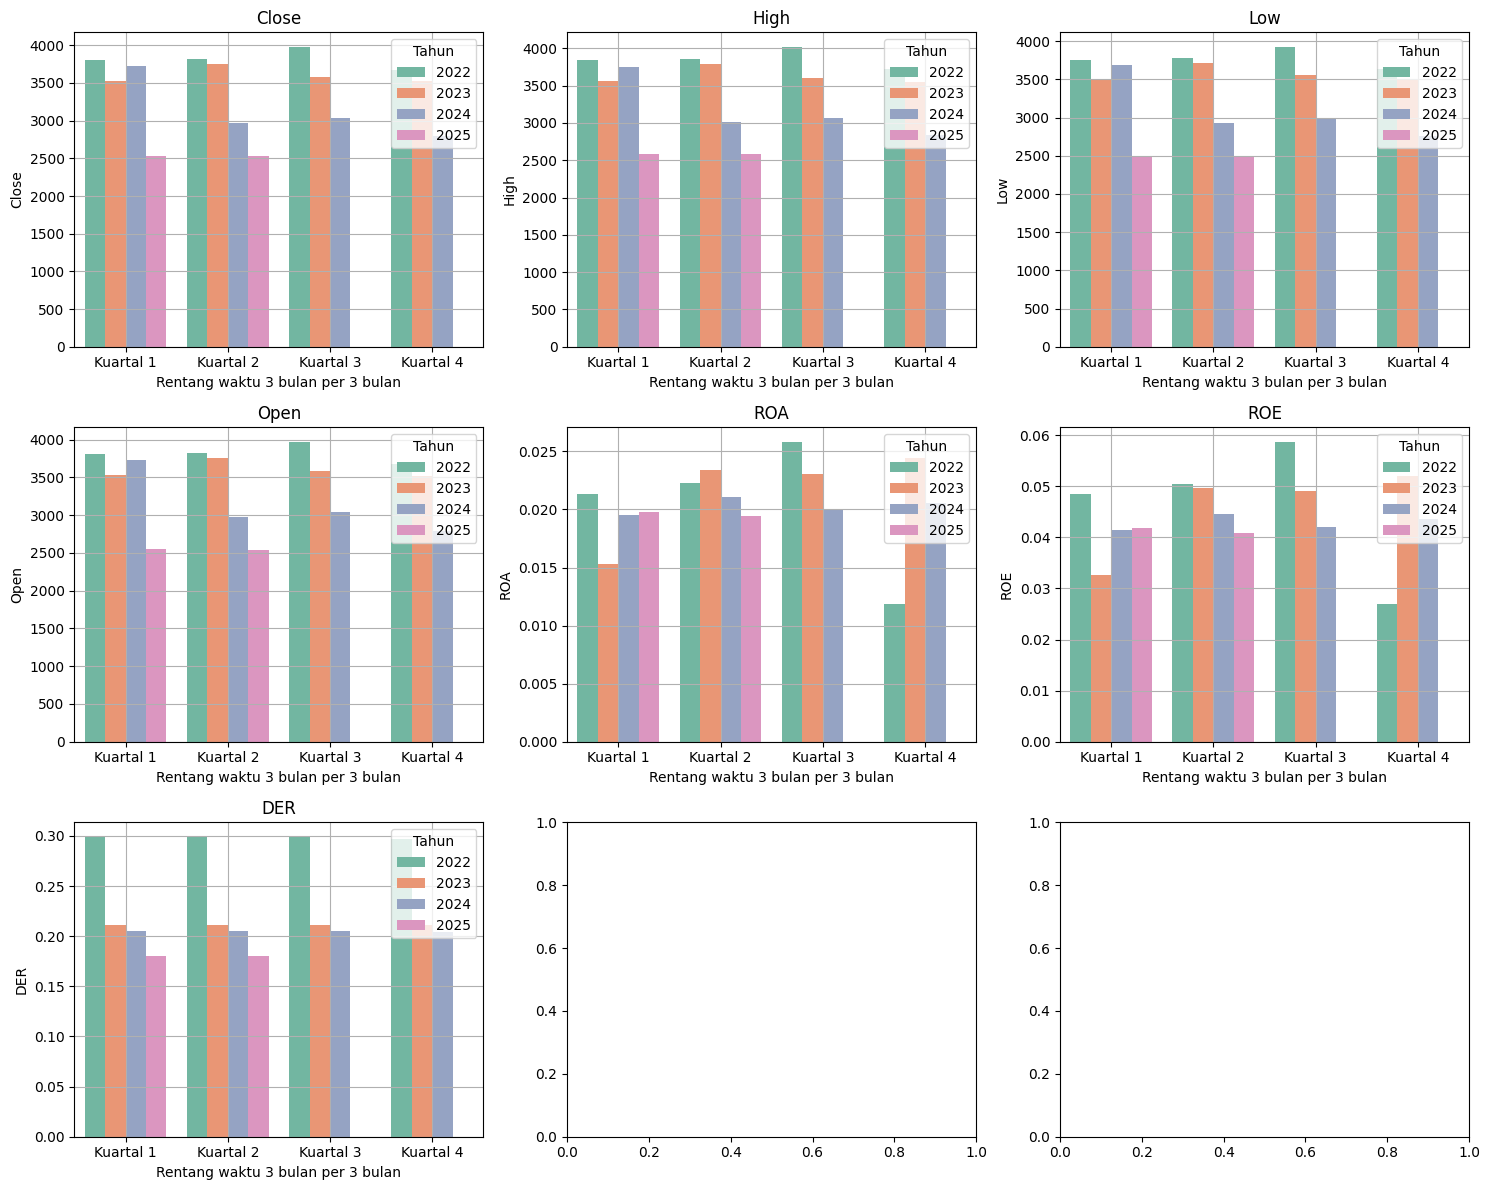

In [57]:
# Mengambil informasi Year dan Quarter dari indeks datetime
df['Year'] = df.index.year
df['Quarter'] = df.index.quarter

# Konversi nilai quarter ke string seperti "Kuartal 1"
df['Quarter_Label'] = df['Quarter'].apply(lambda x: f'Kuartal {x}')

# Agregasi rata-rata per kuartal
quarterly_avg = df.groupby(['Year', 'Quarter', 'Quarter_Label'])[['Close', 'High', 'Low', 'Open', 'ROA', 'ROE', 'DER']].mean().reset_index()

# Fitur yang ingin divisualisasikan
features = ['Close', 'High', 'Low', 'Open', 'ROA', 'ROE', 'DER']
titles = ['Close', 'High', 'Low', 'Open', 'ROA', 'ROE', 'DER']

# Buat subplot 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  # ubah ke 1 dimensi untuk looping

# Loop untuk setiap fitur dan subplot
for i, feature in enumerate(features):
    sns.barplot(
        data=quarterly_avg,
        x='Quarter_Label',
        y=feature,
        hue='Year',
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Rentang waktu 3 bulan per 3 bulan")
    axes[i].set_ylabel(feature)
    axes[i].legend(title='Tahun')
    axes[i].grid(True)

# Rapikan layout
plt.tight_layout()
plt.show()


In [58]:
# Assuming 'df' is your DataFrame as defined in the previous code
# Drop the 'Quarter' column
df = df.drop(columns=['Quarter','Year', 'Quarter_Label'])

print(df.head())

                  Close         High          Low         Open    Net Income  \
Date                                                                           
2022-01-03  3646.828613  3646.828613  3533.410499  3542.134969  5.890000e+12   
2022-01-04  3638.104004  3664.277414  3620.655064  3646.828474  5.890000e+12   
2022-01-05  3533.410400  3655.552982  3515.961460  3620.655102  5.890000e+12   
2022-01-06  3594.481689  3594.481689  3515.961458  3568.308279  5.890000e+12   
2022-01-07  3638.104004  3655.552944  3568.308244  3594.481654  5.890000e+12   

            Stockholders Equity  Long Term Debt  Total Assets  \
Date                                                            
2022-01-03         1.216310e+14    3.631900e+13  2.761580e+14   
2022-01-04         1.216310e+14    3.631900e+13  2.761580e+14   
2022-01-05         1.216310e+14    3.631900e+13  2.761580e+14   
2022-01-06         1.216310e+14    3.631900e+13  2.761580e+14   
2022-01-07         1.216310e+14    3.631900e+13  

In [59]:
df.describe(include='all')

,Close,High,Low,Open,Net Income,Stockholders Equity,Long Term Debt,Total Assets,Total Liabilities Net Minority Interest,ROE,ROA,DER
count,808.000000,808.000000,808.000000,808.000000,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,8.080000e+02,808.000000,808.000000,808.000000
mean,3415.080548,3452.638465,3378.734784,3417.984742,5.777271e+12,1.300842e+14,3.001474e+13,2.812072e+14,1.298672e+14,0.044485,0.020539,0.232841
std,474.435201,472.711369,473.208470,473.414349,1.008418e+12,6.717831e+12,4.219758e+12,7.860679e+12,3.302219e+12,0.008218,0.003676,0.044403
min,2290.000000,2300.000000,2050.000000,2050.000000,3.270000e+12,1.216310e+14,2.551800e+13,2.748170e+14,1.257420e+14,0.026900,0.011800,0.179800
25%,3010.000000,3050.000000,2980.000000,3000.000000,5.708000e+12,1.216310e+14,2.733100e+13,2.748170e+14,1.257420e+14,0.041300,0.019500,0.204900
50%,3563.171143,3608.389174,3525.820140,3571.764199,5.936000e+12,1.292240e+14,2.777300e+13,2.761580e+14,1.303570e+14,0.044600,0.021100,0.211500
75%,3750.823486,3779.096104,3716.912157,3750.823601,6.330000e+12,1.355760e+14,3.631900e+13,2.865920e+14,1.309860e+14,0.049700,0.023000,0.298600
max,4295.701172,4313.788335,4205.265490,4250.483398,7.190000e+12,1.418880e+14,3.631900e+13,2.992970e+14,1.371510e+14,0.059100,0.026000,0.298600


### Penjelasan Hasil Analisis Statistik Deskriptif

print("""
Hasil analisis deskriptif dari data saham dan kinerja keuangan menunjukkan beberapa poin penting:

1. **Harga Saham:**
   - Rata-rata harga penutupan (Close) adalah sekitar Rp 3.415, dengan nilai minimum Rp 2.290 dan maksimum Rp 4.295.
   - Deviasi standar sebesar Rp 474 mengindikasikan bahwa fluktuasi harga masih dalam batas wajar dan tidak terlalu ekstrem.
   - Harga tertinggi (High), terendah (Low), dan pembukaan (Open) juga memiliki nilai rata-rata yang serupa, menunjukkan pergerakan harian saham relatif stabil.

2. **Kinerja Keuangan:**
   - Rata-rata laba bersih (Net Income) adalah Rp 5,77 triliun dengan standar deviasi Rp 1 triliun, mencerminkan adanya variasi laba antar periode namun tetap dalam tren positif.
   - Ekuitas pemegang saham (Stockholders Equity) memiliki rata-rata sekitar Rp 130 triliun, menunjukkan struktur permodalan perusahaan yang kuat dan stabil.

3. **Struktur Pendanaan:**
   - Utang jangka panjang (Long Term Debt) rata-rata Rp 30 triliun, jauh lebih kecil dibandingkan total ekuitas.
   - Hal ini menghasilkan rasio DER (Debt to Equity Ratio) sebesar 0,23 yang tergolong rendah, mengindikasikan perusahaan lebih mengandalkan modal sendiri dan memiliki risiko keuangan yang lebih rendah.

4. **Profitabilitas dan Efisiensi:**
   - Return on Equity (ROE) rata-rata berada di 4,45%, menunjukkan tingkat pengembalian yang layak atas modal pemegang saham.
   - Return on Assets (ROA) sebesar 2,05% menunjukkan bahwa masih ada ruang untuk meningkatkan efisiensi penggunaan aset dalam menghasilkan keuntungan.

🧾 **Kesimpulan:**
Secara keseluruhan, data menunjukkan bahwa perusahaan berada dalam kondisi keuangan yang sehat dan stabil. Struktur modal yang konservatif serta laba bersih yang konsisten mendukung kepercayaan investor. Namun, ROA yang relatif rendah menjadi catatan penting untuk meningkatkan efisiensi dalam pemanfaatan aset di masa depan.
""")


In [60]:
df_subset.to_csv('Hasil perhitungan.csv')

In [61]:
df_subset.to_csv('Cleaning_data.csv')

#Preprocessing


###Normalisasi

In [62]:
from joblib import dump

# --- [1] Normalisasi Data ---
features = ['Open', 'High', 'Low' ,'ROA', 'ROE', 'DER']
target = ['Close']




In [63]:
# prompt: simpan ke csv pada variable feature

df[features].to_csv('features.csv', index=False)

In [64]:
df[target].to_csv('target.csv', index=False)

In [65]:
input_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = input_scaler.fit_transform(df[features])
scaled_target = target_scaler.fit_transform(df[target])

# Gabungkan target + fitur → Close di index 0
# scaled_data = np.hstack([scaled_target, scaled_features])

# Simpan scaler
dump(input_scaler, 'scaler_input_3.pkl')
dump(target_scaler, 'scaler_close_3.pkl')
print("Scaler disimpan sebagai 'scaler_input.pkl' dan 'scaler_close.pkl'")

Scaler disimpan sebagai 'scaler_input.pkl' dan 'scaler_close.pkl'


In [66]:
print(scaled_features[:5])
print(scaled_target[:5])

[[0.67809417 0.66880346 0.68827275 0.66901408 0.66770186 1.        ]
 [0.72567168 0.67746813 0.72875248 0.66901408 0.66770186 1.        ]
 [0.7137773  0.67313578 0.68017674 0.66901408 0.66770186 1.        ]
 [0.68998852 0.64280921 0.68017674 0.66901408 0.66770186 1.        ]
 [0.70188289 0.67313576 0.7044646  0.66901408 0.66770186 1.        ]]
[[0.67648593]
 [0.67213602]
 [0.61993801]
 [0.65038686]
 [0.67213602]]


###windowing


In [67]:
def create_sequences(features, target, window_size):
    X, y = [], []
    for i in range(len(features) - window_size):
        X.append(features[i:i + window_size])  # Hanya fitur
        y.append(target[i + window_size])  # Target (Close)
    return np.array(X), np.array(y)

# Buat sequence dataset
window_size = 30
X, y = create_sequences(scaled_features, scaled_target, window_size)

print(f"✅ Shape X: {X.shape}, Shape y: {y.shape}")

✅ Shape X: (778, 30, 6), Shape y: (778, 1)


#Pengujian data split 80:20

In [ ]:
# --- Split  80:20
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (622, 30, 6)
y_train shape: (622, 1)
X_test shape: (156, 30, 6)
y_test shape: (156, 1)


### Model BI-LSTM

In [ ]:
print(X.shape)
print(y.shape)

(778, 30, 6)
(778, 1)


In [ ]:

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(window_size, len(features))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: Prediksi Close price

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print("✅ Shape X:", X.shape)
print("✅ Shape y:", y.shape)

✅ Shape X: (778, 30, 6)
✅ Shape y: (778, 1)


In [ ]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Prediksi
y_pred = model.predict(X_test)

# Inverse transform
close_scaler = load('scaler_close_3.pkl')
y_pred_inv = close_scaler.inverse_transform(y_pred)
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))



print("Model input shape:", model.input_shape)
print("Model summary:")
model.summary()

# Hitung metrik
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse}")
print(f"MAE : {mae}")

mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
print(f"MAPE: {mape:.2f}%")




Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.1554 - mean_absolute_error: 0.3118 - val_loss: 0.0518 - val_mean_absolute_error: 0.2194
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.1055 - val_loss: 0.0273 - val_mean_absolute_error: 0.1544
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0105 - mean_absolute_error: 0.0816 - val_loss: 0.0159 - val_mean_absolute_error: 0.1132
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0715 - val_loss: 0.0088 - val_mean_absolute_error: 0.0803
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0073 - mean_absolute_error: 0.0660 - val_loss: 0.0077 - val_mean_absolute_error: 0.0743
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0606 - val_loss: 0.0047 - val_mean_absolute_error: 0.0570
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0052 - mean_absolute_error: 0.0571 - val_loss

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 256)        │       138,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       122,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 783,425 (2.99 MB)

 Trainable params: 261,141 (1020.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 522,284 (1.99 MB)

RMSE: 99.50896465876035
MAE : 78.75482960236378
MAPE: 2.95%


#Pengujian data split 70 : 30

In [ ]:
# --- Split  70:30
split = int(0.7 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (544, 30, 6)
y_train shape: (544, 1)
X_test shape: (234, 30, 6)
y_test shape: (234, 1)


In [ ]:

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(window_size, len(features))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: Prediksi Close price

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

print("Model input shape:", model.input_shape)
print("Model summary:")
model.summary()

# Prediksi
y_pred = model.predict(X_test)

# Inverse transform
close_scaler = load('scaler_close_3.pkl')
y_pred_inv = close_scaler.inverse_transform(y_pred)
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Hitung metrik
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse}")
print(f"MAE : {mae}")

mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
print(f"MAPE: {mape:.2f}%")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.1511 - mean_absolute_error: 0.3103 - val_loss: 0.0505 - val_mean_absolute_error: 0.2149
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0229 - mean_absolute_error: 0.1247 - val_loss: 0.0232 - val_mean_absolute_error: 0.1383
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0825 - val_loss: 0.0188 - val_mean_absolute_error: 0.1222
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0097 - mean_absolute_error: 0.0769 - val_loss: 0.0173 - val_mean_absolute_error: 0.1175
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0075 - mean_absolute_error: 0.0678 - val_loss: 0.0175 - val_mean_absolute_error: 0.1194
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0063 - mean_absolute_error: 0.0637 - val_loss: 0.0161 - val_mean_absolute_error: 0.1139
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0070 - mean_absolute_error: 0.0676 - val_loss

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 256)        │       138,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       122,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 783,425 (2.99 MB)

 Trainable params: 261,141 (1020.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 522,284 (1.99 MB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step
RMSE: 128.52955762217803
MAE : 104.9570051665999
MAPE: 3.87%


#Pengujian data split 90 : 10

In [ ]:
# --- Split  70:30
split = int(0.9 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (700, 30, 6)
y_train shape: (700, 1)
X_test shape: (78, 30, 6)
y_test shape: (78, 1)


In [ ]:
print(X.shape)
print(y.shape)

(778, 30, 6)
(778, 1)


In [ ]:

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(window_size, len(features))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: Prediksi Close price

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

print("Model input shape:", model.input_shape)
print("Model summary:")
model.summary()

# Prediksi
y_pred = model.predict(X_test)

# Inverse transform
close_scaler = load('scaler_close_3.pkl')
y_pred_inv = close_scaler.inverse_transform(y_pred)
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Hitung metrik
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse}")
print(f"MAE : {mae}")

mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
print(f"MAPE: {mape:.2f}%")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - loss: 0.1044 - mean_absolute_error: 0.2426 - val_loss: 0.0117 - val_mean_absolute_error: 0.0948
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0124 - mean_absolute_error: 0.0908 - val_loss: 0.0058 - val_mean_absolute_error: 0.0647
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0076 - mean_absolute_error: 0.0684 - val_loss: 0.0032 - val_mean_absolute_error: 0.0481
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0070 - mean_absolute_error: 0.0660 - val_loss: 0.0028 - val_mean_absolute_error: 0.0431
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0058 - mean_absolute_error: 0.0588 - val_loss: 0.0028 - val_mean_absolute_error: 0.0425
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054 - mean_absolute_error: 0.0556 - val_loss: 0.0029 - val_mean_absolute_error: 0.0438
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0049 - mean_absolute_error: 0.0544 - val_los

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 256)        │       138,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       122,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 783,425 (2.99 MB)

 Trainable params: 261,141 (1020.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 522,284 (1.99 MB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step
RMSE: 112.454750426408
MAE : 88.58160243890224
MAPE: 3.49%


#Pengujian data split 85 : 15

In [ ]:
# --- Split  85:15
split = int(0.85 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (661, 30, 6)
y_train shape: (661, 1)
X_test shape: (117, 30, 6)
y_test shape: (117, 1)


In [ ]:
print(X.shape)
print(y.shape)

(778, 30, 6)
(778, 1)


In [ ]:

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(window_size, len(features))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: Prediksi Close price

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

print("Model input shape:", model.input_shape)
print("Model summary:")
model.summary()

# Prediksi
y_pred = model.predict(X_test)

# Inverse transform
close_scaler = load('scaler_close_3.pkl')
y_pred_inv = close_scaler.inverse_transform(y_pred)
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Hitung metrik
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse}")
print(f"MAE : {mae}")

mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
print(f"MAPE: {mape:.2f}%")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - loss: 0.0835 - mean_absolute_error: 0.2178 - val_loss: 0.0088 - val_mean_absolute_error: 0.0808
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0834 - val_loss: 0.0088 - val_mean_absolute_error: 0.0807
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0077 - mean_absolute_error: 0.0704 - val_loss: 0.0067 - val_mean_absolute_error: 0.0690
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0064 - mean_absolute_error: 0.0631 - val_loss: 0.0042 - val_mean_absolute_error: 0.0534
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0618 - val_loss: 0.0034 - val_mean_absolute_error: 0.0472
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0055 - mean_absolute_error: 0.0587 - val_loss: 0.0027 - val_mean_absolute_error: 0.0418
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mean_absolute_error: 0.0583 - val_los

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 256)        │       138,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       122,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 783,425 (2.99 MB)

 Trainable params: 261,141 (1020.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 522,284 (1.99 MB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step
RMSE: 98.07633649003084
MAE : 79.26027268629808
MAPE: 3.07%


#Pengujian data split 75 : 25

In [70]:
# --- Split  75:25
split = int(0.75 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [71]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (583, 30, 6)
y_train shape: (583, 1)
X_test shape: (195, 30, 6)
y_test shape: (195, 1)


In [72]:
print(X.shape)
print(y.shape)

(778, 30, 6)
(778, 1)


In [72]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(window_size, len(features))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: Prediksi Close price

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

print("Model input shape:", model.input_shape)
print("Model summary:")
model.summary()

# Prediksi
y_pred = model.predict(X_test)

# Inverse transform
close_scaler = load('scaler_close_3.pkl')
y_pred_inv = close_scaler.inverse_transform(y_pred)
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# Hitung metrik
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse}")
print(f"MAE : {mae}")

mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
print(f"MAPE: {mape:.2f}%")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.1593 - mean_absolute_error: 0.3183 - val_loss: 0.0486 - val_mean_absolute_error: 0.2125
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.1053 - val_loss: 0.0263 - val_mean_absolute_error: 0.1521
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0095 - mean_absolute_error: 0.0766 - val_loss: 0.0147 - val_mean_absolute_error: 0.1082
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0744 - val_loss: 0.0117 - val_mean_absolute_error: 0.0945
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0688 - val_loss: 0.0117 - val_mean_absolute_error: 0.0953
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0062 - mean_absolute_error: 0.0607 - val_loss: 0.0073 - val_mean_absolute_error: 0.0713
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0052 - mean_absolute_error: 0.0570 - val_loss

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 256)        │       138,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       122,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 783,425 (2.99 MB)

 Trainable params: 261,141 (1020.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 522,284 (1.99 MB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
RMSE: 96.5030833599686
MAE : 77.16225085136217
MAPE: 2.86%


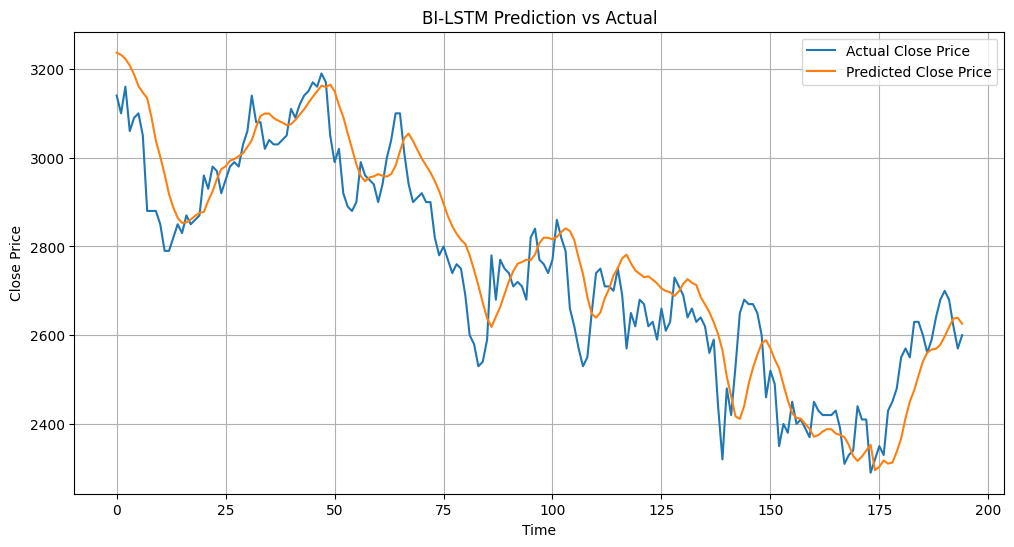

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Close Price')
plt.plot(y_pred_inv, label='Predicted Close Price')
plt.title('BI-LSTM Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Model LSTM

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- [4] Buat Model LSTM ---
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output: 1 nilai (Close price)

model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        35,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,971 (410.04 KB)

 Trainable params: 104,971 (410.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1573 - mean_absolute_error: 0.2989 - val_loss: 0.0275 - val_mean_absolute_error: 0.1552
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0153 - mean_absolute_error: 0.0995 - val_loss: 0.0244 - val_mean_absolute_error: 0.1458
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0116 - mean_absolute_error: 0.0869 - val_loss: 0.0150 - val_mean_absolute_error: 0.1103
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0089 - mean_absolute_error: 0.0746 - val_loss: 0.0107 - val_mean_absolute_error: 0.0898
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0074 - mean_absolute_error: 0.0677 - val_loss: 0.0055 - val_mean_absolute_error: 0.0598
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0080 - mean_absolute_error: 0.0711 - val_loss: 0.0061 - val_mean_absolute_error: 0.0629
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0063 - mean_absolute_error: 0.0604 - val_loss

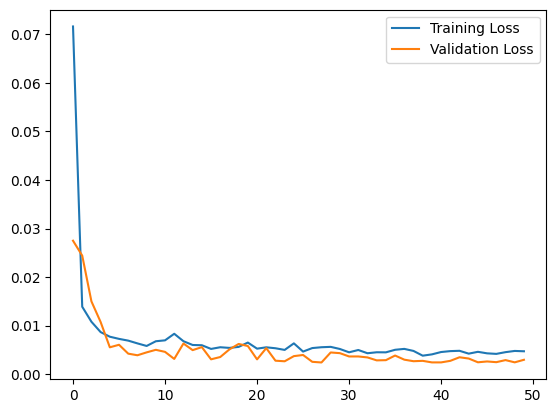

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
RMSE: 109.1036881398154
MAE: 86.19593850160257
MAPE: 3.18%


In [74]:
# --- [5] Training Model ---
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# --- [6] Plot Loss ---
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# --- [7] Evaluasi Model ---
y_pred = model.predict(X_test)

# reshape ke 2 dimensi
y_pred_2d = y_pred.reshape(-1, 1)
y_test_2d = y_test.reshape(-1, 1)

# inverse transform
from joblib import load
close_scaler = load('scaler_close_3.pkl')

y_pred_orig = close_scaler.inverse_transform(y_pred_2d)
y_test_orig = close_scaler.inverse_transform(y_test_2d)

# hitung metrik evaluasi

rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
mae = mean_absolute_error(y_test_orig, y_pred_orig)
mape = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape:.2f}%')

#Summary

Pengujian data


*   Data split dengan 80:20 BILSTM mendapatkan hasil Mape 2.95
*   Data split dengan 70:30 BILSTM mendapatkan hasil Mape 3.87
*   Data split dengan 90:10 BILSTM mendapatkan hasil Mape 3.49
*   Data split dengan 85:15 BILSTM mendapatkan hasil Mape 3.07
*   Data split dengan 75:25 BILSTM mendapatkan hasil Mape 2.74

*   Data split dengan 75:2 LSTM mendapatkan hasil Mape 2.90




#Deploy Model

In [74]:
model.input_shape

(None, 30, 6)

In [75]:
model.save('bilstm_model_3.h5')

In [76]:
model.save("BILSTM_model.keras")  # format baru

#Dependency library

In [77]:
!pip freeze > requirements_3.txt

In [78]:
%%writefile requirements_3.txt
pandas==2.2.2   # Ganti dengan versi Pandas yang Anda dapat
numpy==2.0.2     # Ganti dengan versi NumPy yang Anda dapat
tensorflow==2.19.0 # Ganti dengan versi TensorFlow yang Anda dapat (misal 2.15.0 atau 2.16.1)
# Jika Anda menggunakan Keras 3.x terpisah (bukan tf.keras)
# keras==3.8.0     # Ganti dengan versi Keras yang Anda dapat
yfinance==0.2.XX   # Ganti dengan versi yfinance yang Anda dapat
scikit-learn== 1.6.1 # Ganti dengan versi scikit-learn
joblib==1.5.1    # Ganti dengan versi joblib

Overwriting requirements_3.txt


In [79]:
from google.colab import files
files.download('requirements_3.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>